<a href="https://colab.research.google.com/github/Emsnehh/StockMarketPredictor/blob/main/StockMarketPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
df=pd.read_json("/content/sample_data/anscombe.json")


df.head()

# For time stamps
from datetime import datetime

#Import the yfinance library
import yfinance as yf

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-09-03,177.550003,178.259995,175.259995,176.250000,176.250000,37817500,AMAZON
2024-09-04,174.479996,175.979996,172.539993,173.330002,173.330002,30309200,AMAZON
2024-09-05,175.000000,179.880005,175.000000,177.889999,177.889999,40170500,AMAZON
2024-09-06,177.240005,178.380005,171.160004,171.389999,171.389999,41466500,AMAZON
2024-09-09,174.529999,175.850006,173.509995,175.399994,175.399994,29037400,AMAZON
2024-09-10,177.490005,180.500000,176.789993,179.550003,179.550003,36233800,AMAZON
2024-09-11,180.100006,184.990005,175.729996,184.520004,184.520004,42564700,AMAZON
2024-09-12,184.800003,187.410004,183.539993,187.000000,187.000000,33622500,AMAZON
2024-09-13,187.000000,188.500000,185.910004,186.490005,186.490005,26476500,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,191.627103,193.403016,189.986270,191.784326,191.291305,5.919069e+07
std,19.160706,19.385503,18.695600,19.084527,19.264462,2.483759e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.557507,177.442505,173.949997,175.677505,174.799145,4.514632e+07
50%,187.880005,189.279999,186.700005,187.844994,187.256287,5.305725e+07
75%,200.642498,210.337505,198.017502,207.294998,207.055332,6.562042e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-13 to 2024-09-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


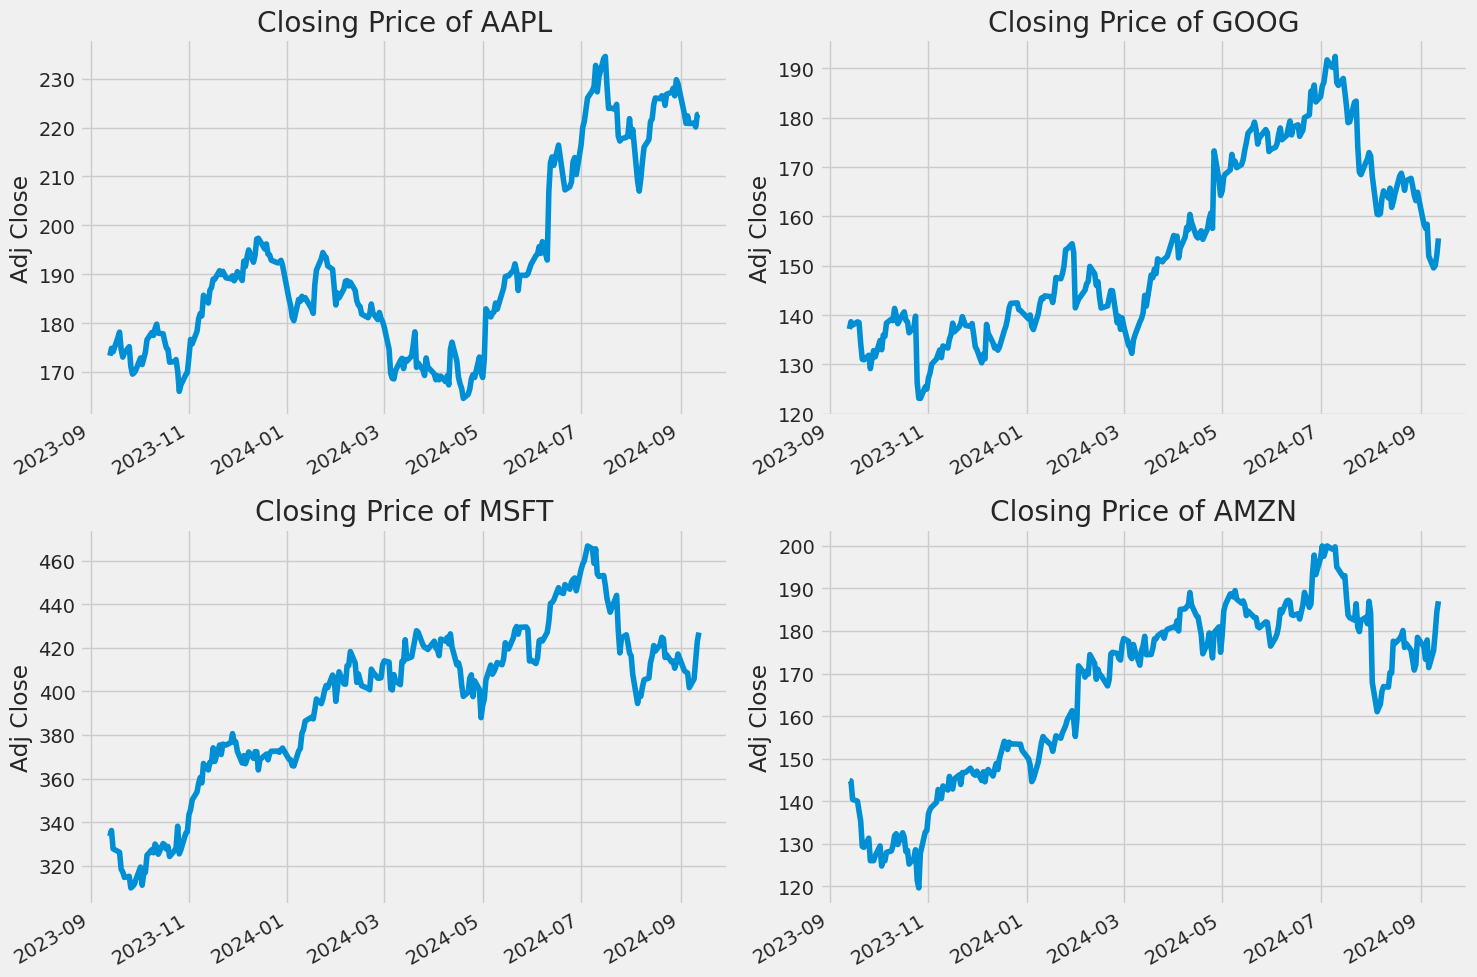

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

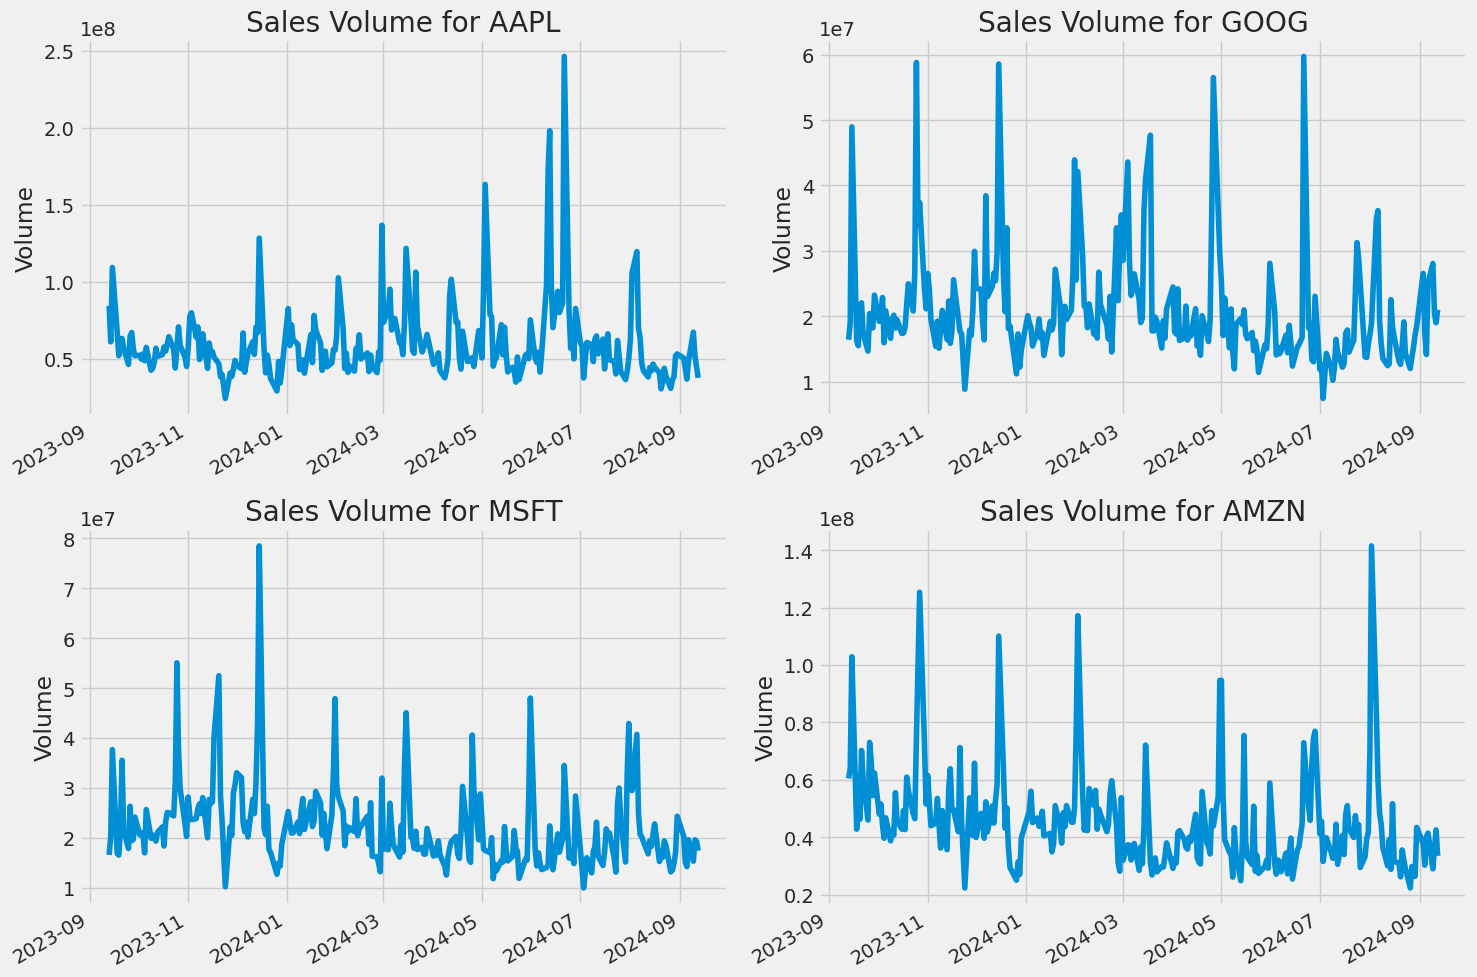

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

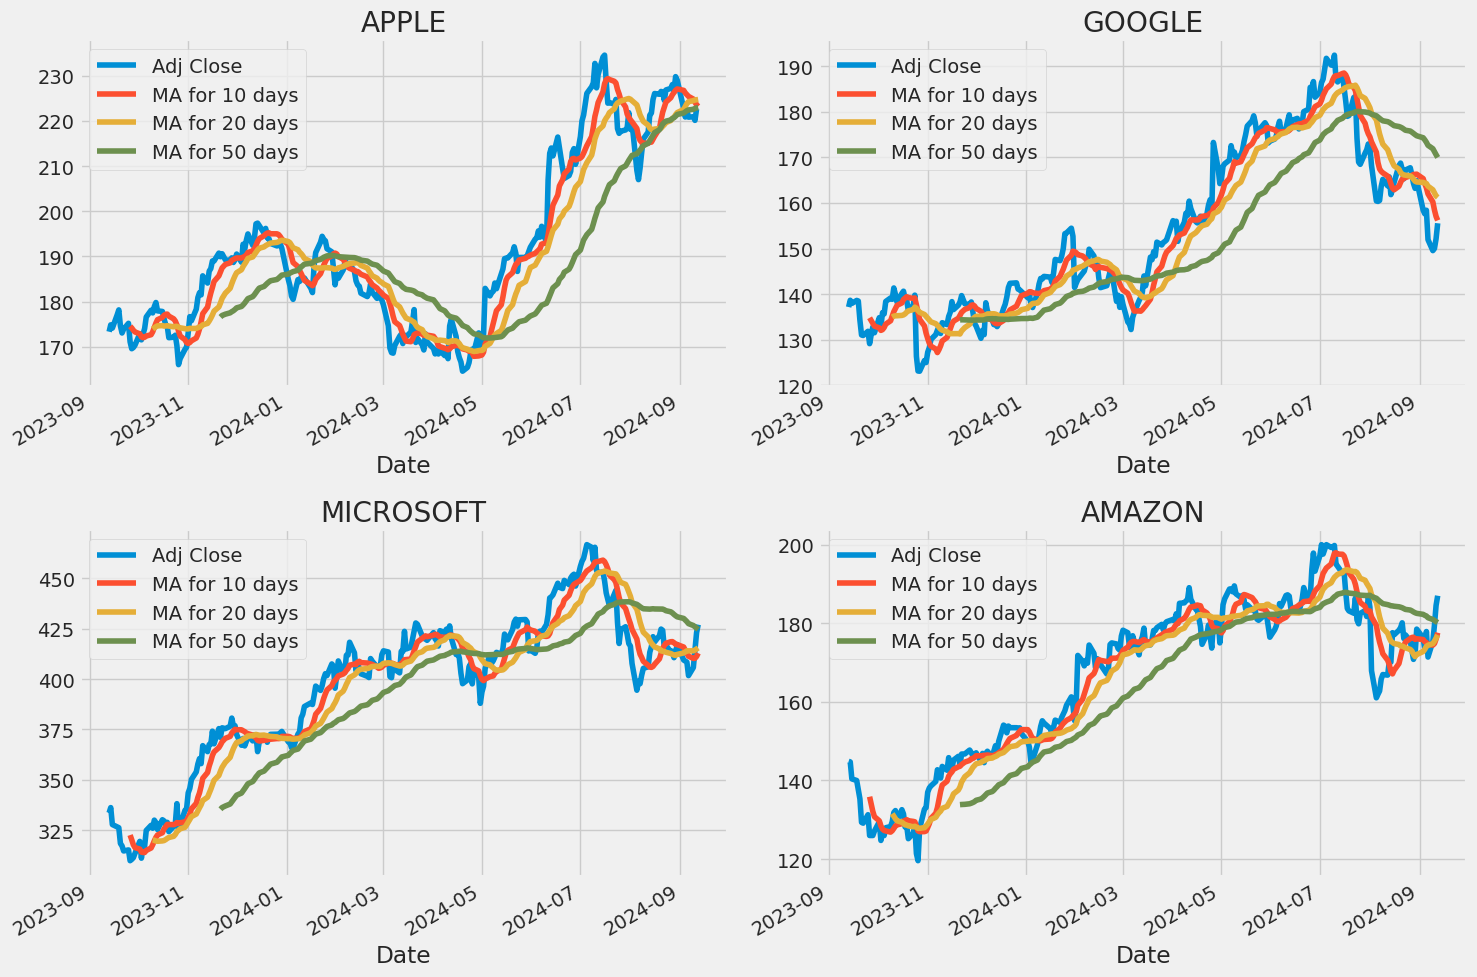

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

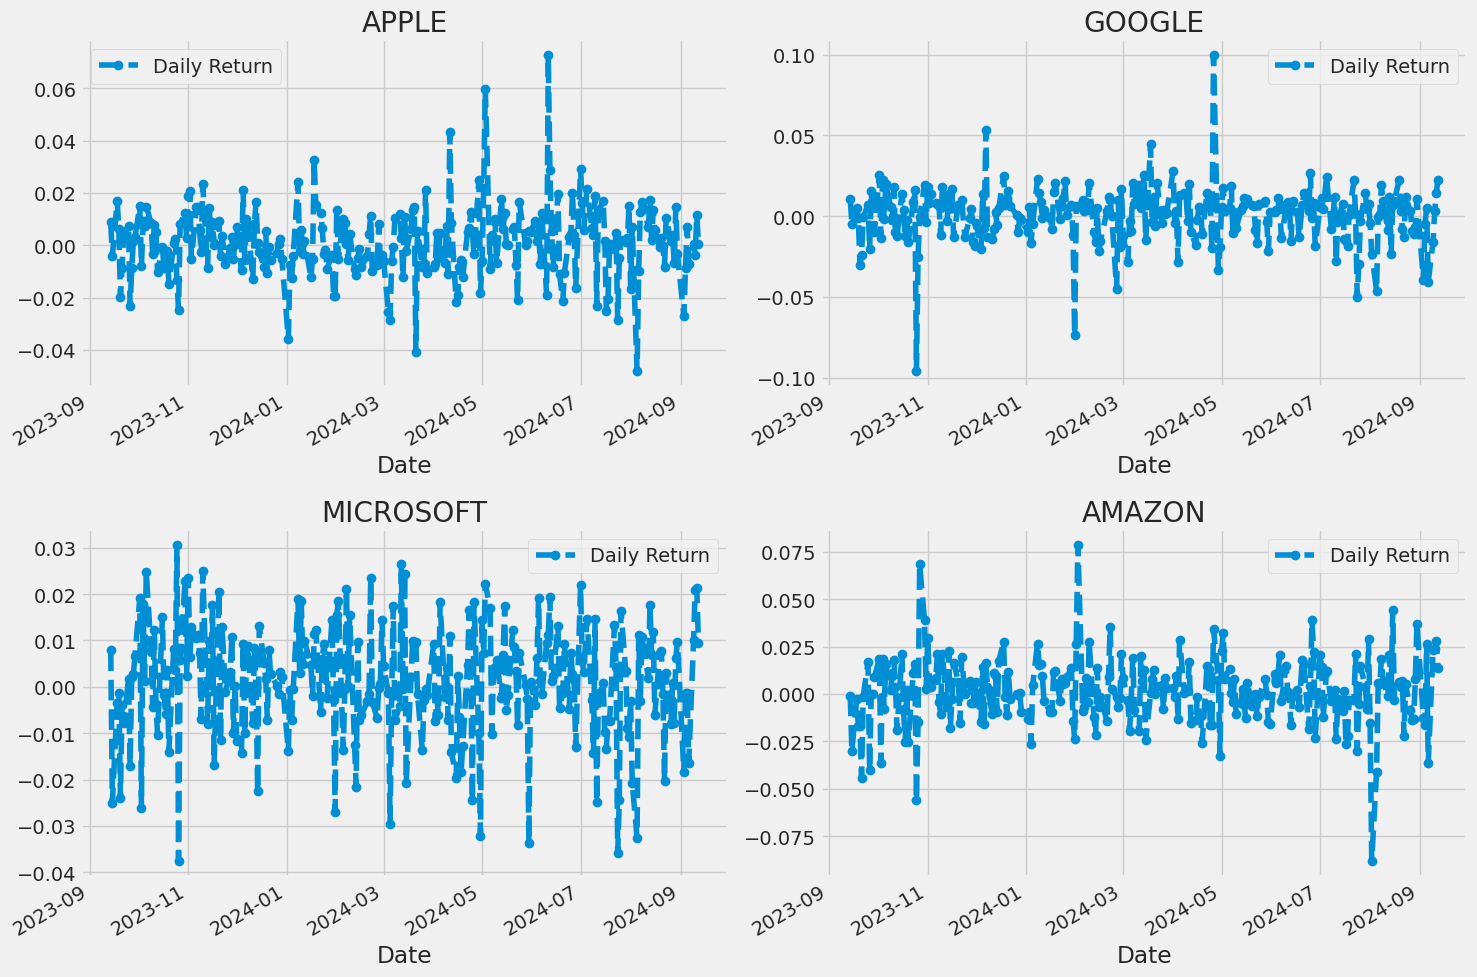

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [ ]:
closing_df =pd.read_json("/content/sample_data/anscombe.json")
# Make a new tech returns DataFrame
closing_df['X'] = pd.to_numeric(closing_df['X'])
closing_df['Y'] = pd.to_numeric(closing_df['Y'])
closing_df['Series'] = pd.to_numeric(closing_df['Series'], errors='coerce')
tech_rets = closing_df.pct_change()
tech_rets.head()

<ipython-input-25-47e70f85d1e6>:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tech_rets = closing_df.pct_change()


,Series,X,Y
0,NaN,NaN,NaN
1,NaN,-0.200000,-0.135572
2,NaN,0.625000,0.090647
3,NaN,-0.307692,0.162269
4,NaN,0.222222,-0.054484


Text(0.5, 1.0, 'Correlation of stock closing price')

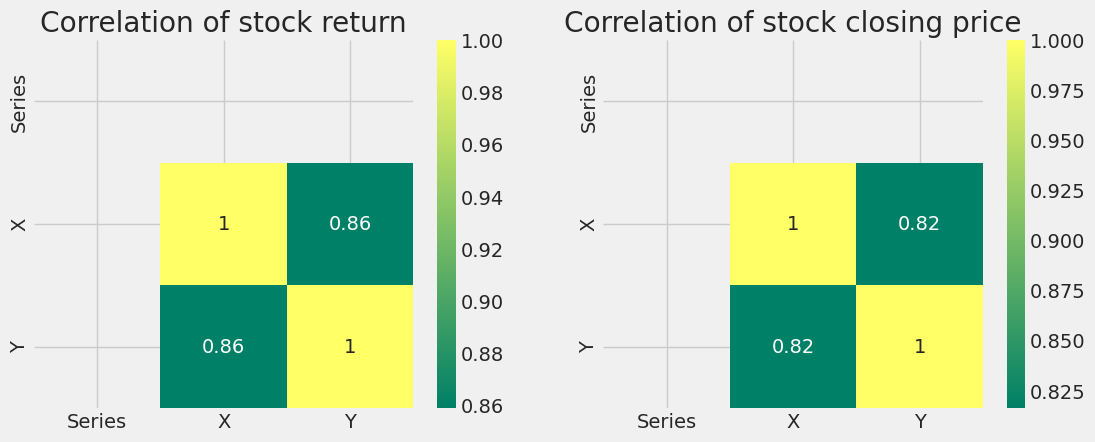

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

<ipython-input-53-af0f7e7af7c4>:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tech_rets = closing_df.pct_change()


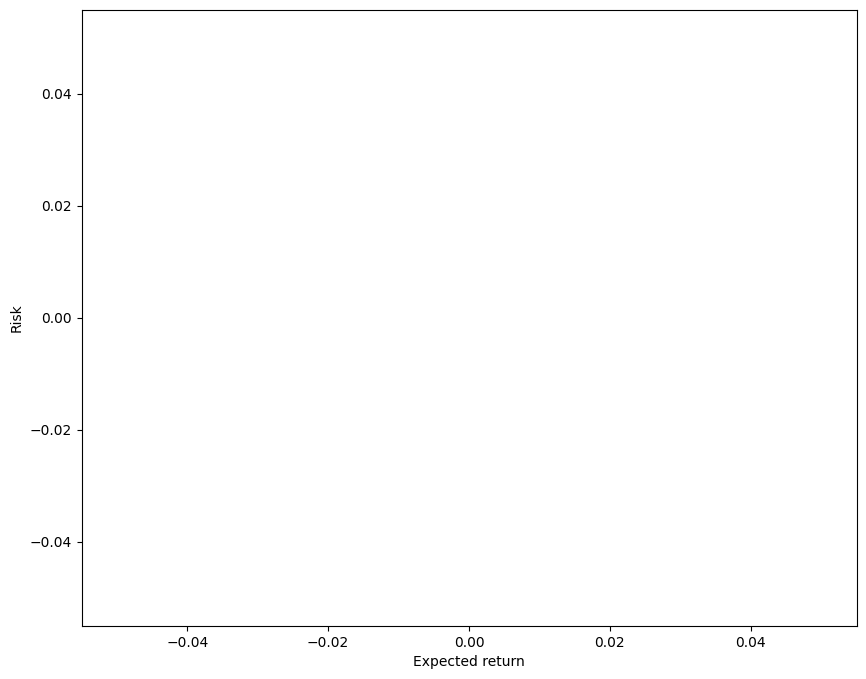

Series   NaN
X        NaN
Y        NaN
dtype: float64
Series   NaN
X        NaN
Y        NaN
dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('TkAgg')  # Use TkAgg backend for plotting - Commenting out this line

# Assuming tech_rets is defined and is a DataFrame with appropriate data

# Ensure tech_rets is defined and is a DataFrame with appropriate data
!pip install pandas
import pandas as pd
closing_df =pd.read_json("/content/sample_data/anscombe.json")

# Make a new tech returns DataFrame
closing_df['X'] = pd.to_numeric(closing_df['X'])
closing_df['Y'] = pd.to_numeric(closing_df['Y'])
closing_df['Series'] = pd.to_numeric(closing_df['Series'], errors='coerce')
tech_rets = closing_df.pct_change()
rets = tech_rets.dropna()

area = np.pi * 20  # Size of the points in the scatter plot

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

print(rets.mean())
print(rets.std())


In [ ]:
# Get the stock quote
df = df=pd.read_json("/content/sample_data/anscombe.json")
# Show teh data
df

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


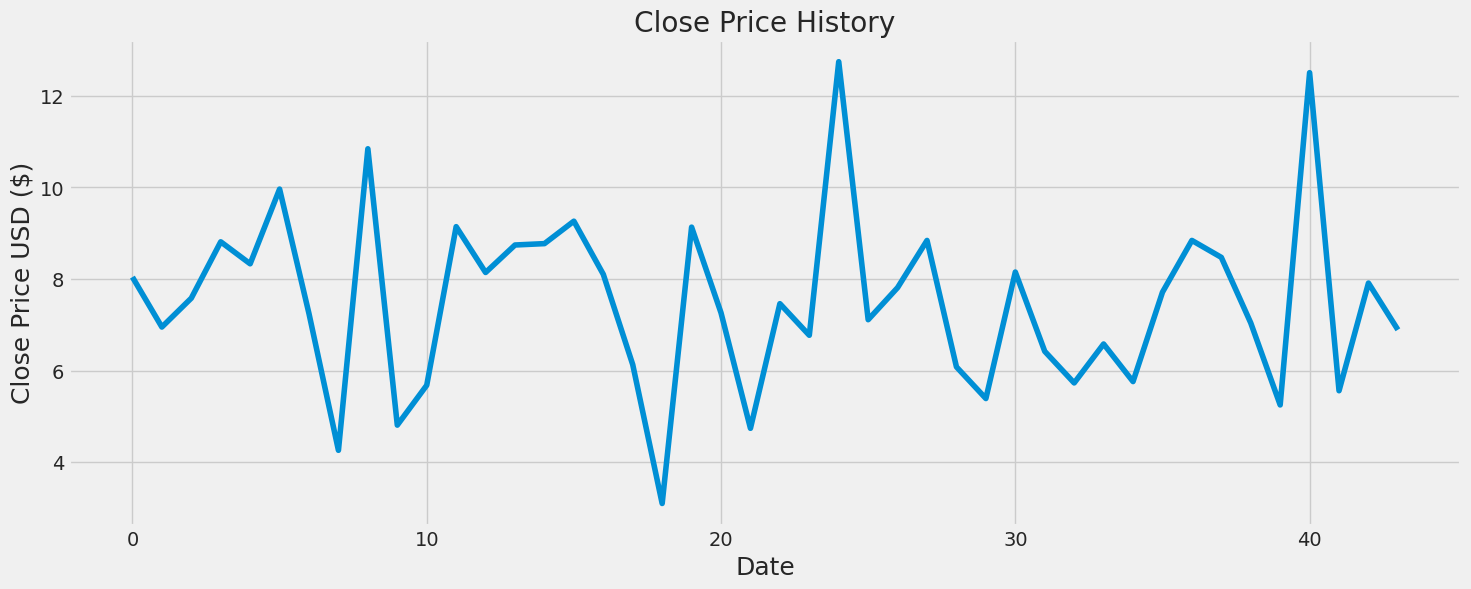

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Y']) # Changed from df['Close'] to df['Y']
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

42

In [ ]:
import numpy as np # Added this line to import the NumPy library with the alias 'np'
# Create a new dataframe with only the 'Close column
df=pd.read_json("/content/sample_data/anscombe.json")

# Convert the dataframe to a numpy array
dataset = df.values # Changed 'data' to 'df'
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

42

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler for scaling

# Create a new dataframe
df=pd.read_json("/content/sample_data/anscombe.json")

# Convert the dataframe to a numpy array
# Exclude the first column ('I') which contains strings
dataset = df.values[:, 1:]

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) # Create a MinMaxScaler object
scaled_data = scaler.fit_transform(dataset) # Fit and transform the data using the scaler


# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

#The original range was (60, len(train_data)). Changed to (6, len(train_data)) so the loop executes
for i in range(6, len(train_data)):
    x_train.append(train_data[i-6:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 7:
        print(x_train)
        print(y_train)
        print()

# Convert the x_

[array([0.4       , 0.26666667, 0.6       , 0.33333333, 0.46666667,
       0.66666667])]
[0.13333333333333336]

[array([0.4       , 0.26666667, 0.6       , 0.33333333, 0.46666667,
       0.66666667]), array([0.26666667, 0.6       , 0.33333333, 0.46666667, 0.66666667,
       0.13333333])]
[0.13333333333333336, 0.0]



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Create a new dataframe
df=pd.read_json("/content/sample_data/anscombe.json")

# Convert the dataframe to a numpy array
# Exclude the first column ('I') which contains strings
dataset = df.values[:, 1:]

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) # Create a MinMaxScaler object
scaled_data = scaler.fit_transform(dataset) # Fit and transform the data using the scaler

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

#The original range was (60, len(train_data)). Changed to (6, len(train_data)) so the loop executes
for i in range(6, len(train_data)):
    x_train.append(train_data[i-6:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.array(y_train) # Convert y_train to a NumPy array


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0899


In [ ]:
 # Get the models predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions
#ORIGINAL CODE: predictions = predictions.reshape(-1, 1) # Reshape to (n_samples, 1)
#The original code reshaped the array to have 1 feature when the scaler was expecting 2 features.
predictions = predictions.reshape(-1, 2) # Reshape to (n_samples, 2) to match original data shape
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
# Only calculate the RMSE for the first feature (column index 0)
rmse = np.sqrt(np.mean(((predictions - y_test[:,0]) ** 2)))
rmse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1.5078559846543442

Train columns: Index(['Series', 'X', 'Y'], dtype='object')
Validation columns: Index(['Series', 'X', 'Y', 'Predictions'], dtype='object')


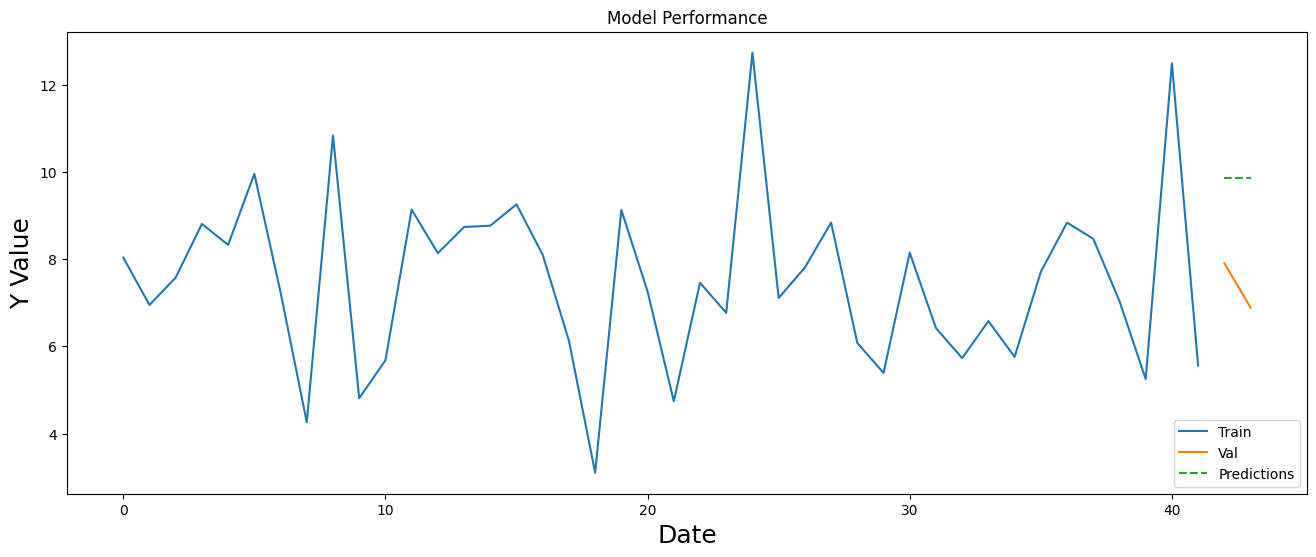

In [ ]:
import matplotlib.pyplot as plt

# Print the columns of train and valid DataFrames to check for available columns
print(f"Train columns: {train.columns}")
print(f"Validation columns: {valid.columns}")

# Check if 'Y' column exists in train and valid DataFrames
if 'Y' not in train.columns:
    raise KeyError("Column 'Y' not found in train DataFrame.")
if 'Y' not in valid.columns:
    raise KeyError("Column 'Y' not found in valid DataFrame.")

# Ensure predictions are present
if 'Predictions' not in valid.columns:
    raise KeyError("Column 'Predictions' not found in valid DataFrame.")

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
# Changed ylabel to reflect the 'Y' column
plt.ylabel('Y Value', fontsize=18)

# Plot training data using 'Y' column
plt.plot(train.index, train['Y'], label='Train')
# Plot validation data and predictions using 'Y' column
plt.plot(valid.index, valid['Y'], label='Val')
plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='--')

plt.legend(loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Series,X,Y,Predictions
42,IV,8,7.91,9.87539
43,IV,8,6.89,9.87539
